In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [14]:
df = pd.read_csv('StudentsPerformance.csv')

In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Dataset Shape: (1000, 8)

Data Types:
 gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Missing Values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


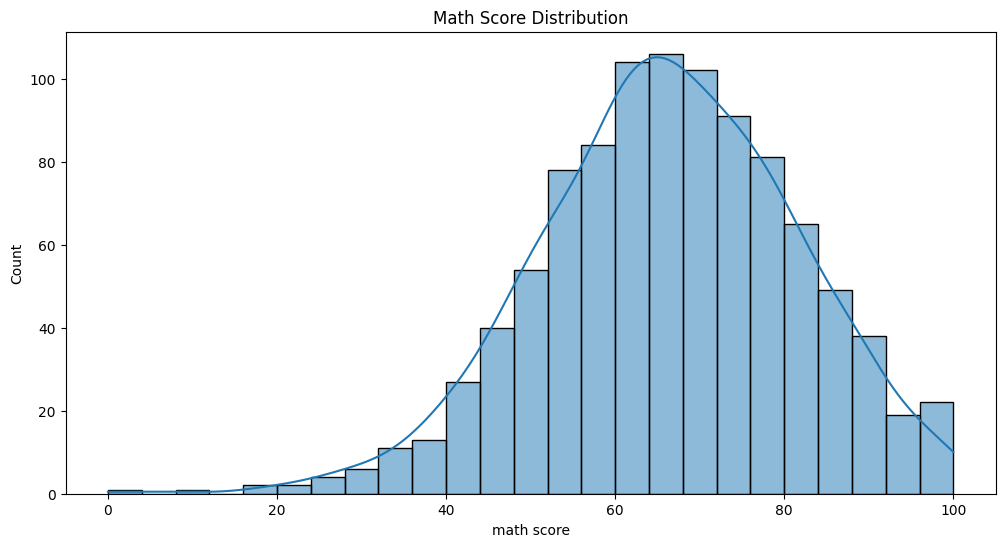

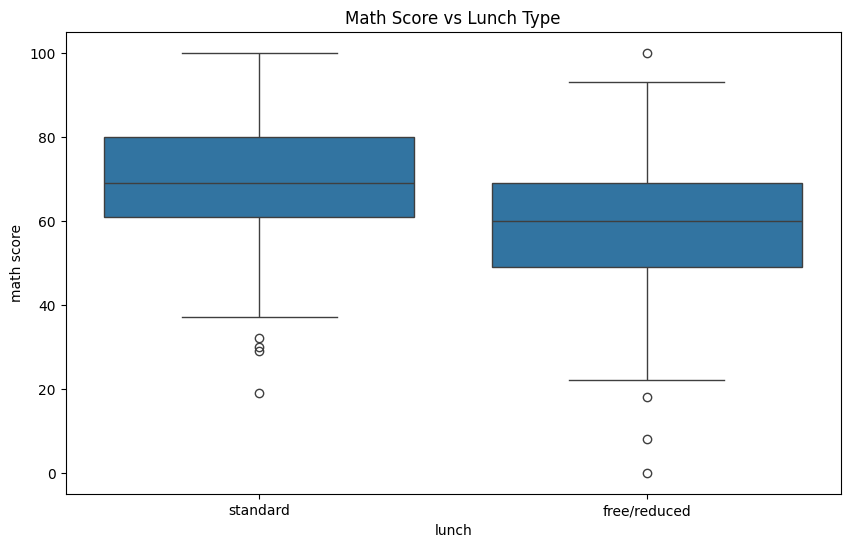

In [7]:

print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())


df.describe()


plt.figure(figsize=(12,6))
sns.histplot(df['math score'], kde=True)
plt.title('Math Score Distribution')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='lunch', y='math score', data=df)
plt.title('Math Score vs Lunch Type')
plt.show()

In [41]:
num_cols=X.select_dtypes(exclude="object").columns
cat_cols=X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_trans=StandardScaler()
oh_tran=OneHotEncoder()

preprocessor=ColumnTransformer(
[
    ("OneHotEncoder",oh_tran,cat_cols),
    ("StandardScaler",num_trans,num_cols),
]
)

In [43]:
x=preprocessor.fit_transform(X)

In [46]:
x.shape

(1000, 17)

In [48]:
#separating train and test for data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)


In [49]:
#creating an evaluate function

def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2=r2_score(true,predicted)
    return mae,mse,rmse,r2

In [67]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns (adjust based on your actual columns)
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Fit and transform the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [68]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'KNN': KNeighborsRegressor(),
    'DT': DecisionTreeRegressor(),
    'RF': RandomForestRegressor()
}

model_list = []
r2_list = []

for name, model in models.items():
    model.fit(X_train_processed, y_train)  # Use processed data
    
    # Make predictions
    y_train_pred = model.predict(X_train_processed)
    y_test_pred = model.predict(X_test_processed)
    
    # Evaluate
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(name)
    model_list.append(name)
    
    print('Model performance for Training set')
    print(f"- Root Mean Squared Error: {model_train_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_train_mae:.4f}")
    print(f"- R2 Score: {model_train_r2:.4f}")
    
    print('---------------------------------------')
    
    print('Model performance for Test set')
    print(f"- Root Mean Squared Error: {model_test_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_test_mae:.4f}")
    print(f"- R2 Score: {model_test_r2:.4f}")
    
    r2_list.append(model_test_r2)
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 15.1681
- Mean Absolute Error: 12.2118
- R2 Score: 0.0142
---------------------------------------
Model performance for Test set
- Root Mean Squared Error: 14.7066
- Mean Absolute Error: 11.1834
- R2 Score: -0.0103


Ridge
Model performance for Training set
- Root Mean Squared Error: 15.1681
- Mean Absolute Error: 12.2116
- R2 Score: 0.0142
---------------------------------------
Model performance for Test set
- Root Mean Squared Error: 14.7054
- Mean Absolute Error: 11.1814
- R2 Score: -0.0101


Lasso
Model performance for Training set
- Root Mean Squared Error: 15.2768
- Mean Absolute Error: 12.2585
- R2 Score: 0.0000
---------------------------------------
Model performance for Test set
- Root Mean Squared Error: 14.6675
- Mean Absolute Error: 11.0817
- R2 Score: -0.0049


KNN
Model performance for Training set
- Root Mean Squared Error: 14.7058
- Mean Absolute Error: 11.7647
- R2 Score: 0.0734
---------

In [69]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Lasso,-0.004896
1,Ridge,-0.010101
0,Linear Regression,-0.010264
3,KNN,-0.229388
5,RF,-0.237604
4,DT,-0.351546


In [72]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 
                   'lunch', 'test preparation course']
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ])


X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train_processed, y_train)


y_pred = lin_model.predict(X_test_processed)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" % score)

Accuracy of the model is -1.03


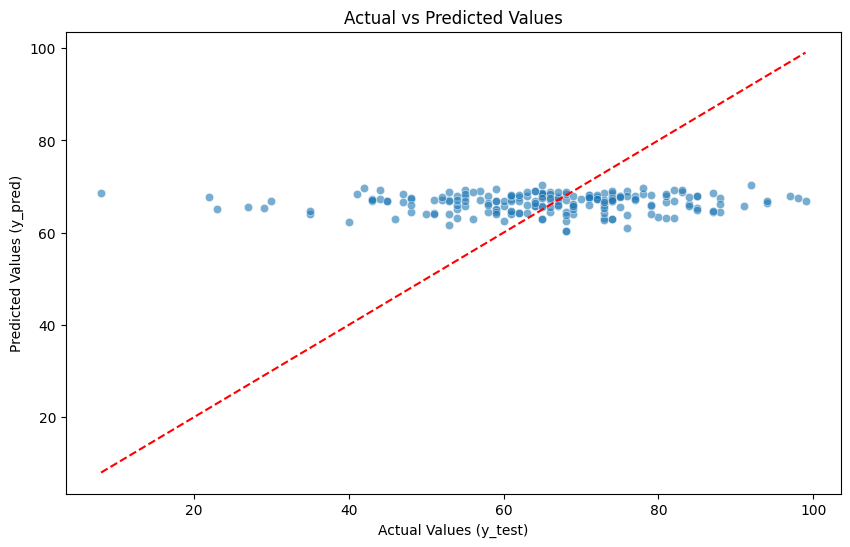

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.show()

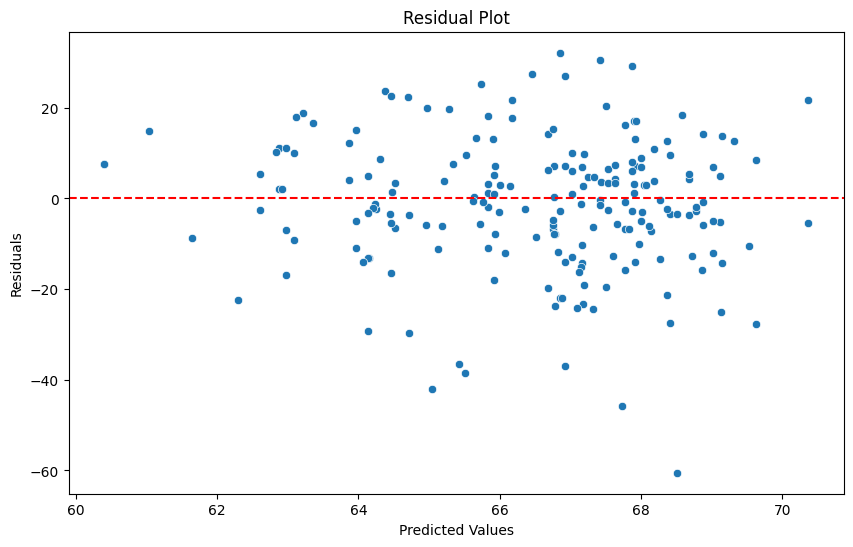

In [74]:
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

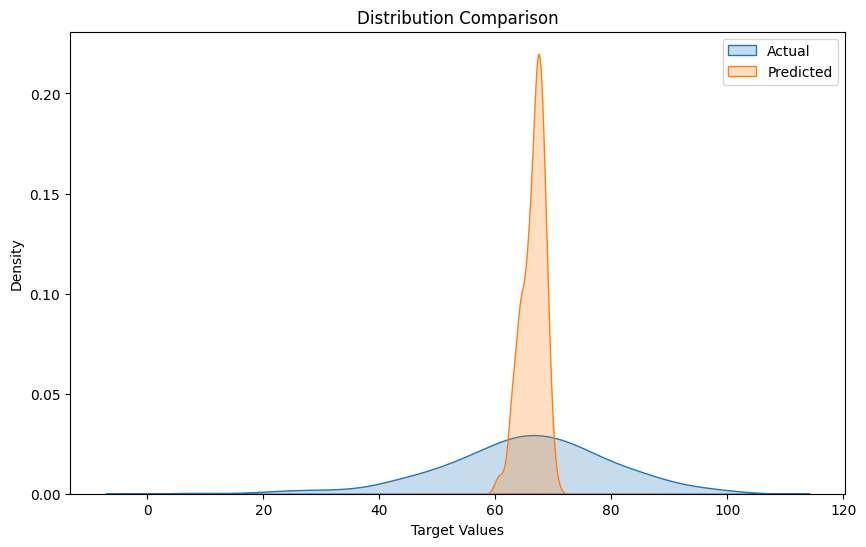

In [75]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual', shade=True)
sns.kdeplot(y_pred, label='Predicted', shade=True)
plt.xlabel('Target Values')
plt.title('Distribution Comparison')
plt.legend()
plt.show()

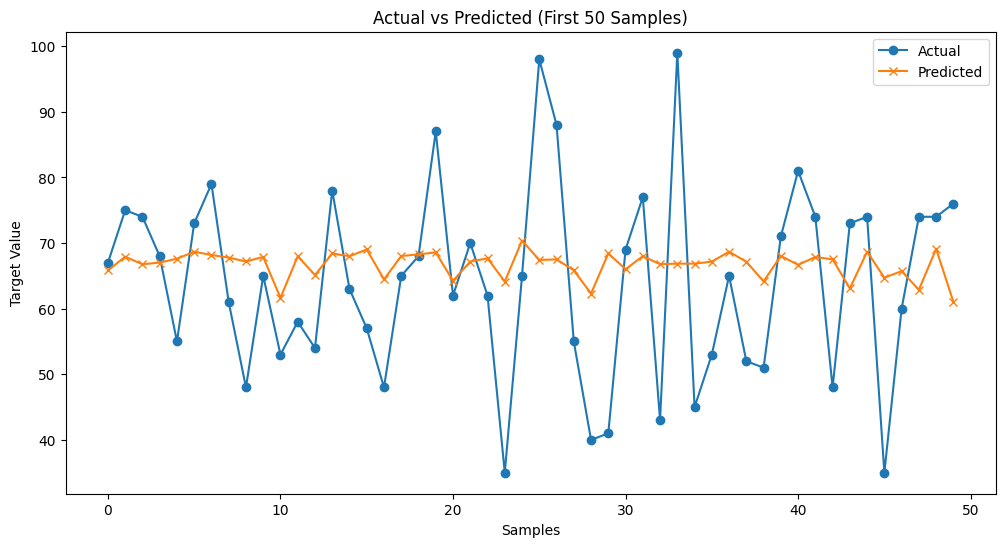

In [76]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:50], label='Actual', marker='o')  # First 50 samples
plt.plot(y_pred[:50], label='Predicted', marker='x')
plt.xlabel('Samples')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted (First 50 Samples)')
plt.legend()
plt.show()